<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Predict_heart_disease_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data available at https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ dataset processed.cleveland.data

Load data via data file

In [32]:
#import necessary libraries
import os
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#rename data file
os.rename("processed.cleveland.data",
          "processed.cleveland.csv")

In [3]:
#convert to dataframe
dataframe = pandas.read_csv("processed.cleveland.csv",
                header = None,
                delimiter = ",",
                error_bad_lines = False)

dataframe

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,10,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Clean dans preprocess data

In [6]:
#rename columns
dataframe.columns = ["age",
                     "sex",
                     "cp",
                     "trestbps",
                     "chol",
                     "fbs",
                     "restecg",
                     "thalach",
                     "exang",
                     "oldpeak",
                     "slope",
                     "ca",
                     "thal",
                     "target"]

dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
#convert all values to numeric
dataframe = dataframe.apply(pandas.to_numeric,
                            errors = "coerce")

dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [9]:
#drop rows with NaN values
dataframe = dataframe.dropna()

dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [10]:
#convert categorical values with onehot encoding
dataframe = pandas.get_dummies(dataframe,
                               columns = ["ca",
                                          "cp",
                                          "exang",
                                          "fbs",
                                          "restecg",
                                          "sex",
                                          "thal",
                                          "slope"])

dataframe

,age,trestbps,chol,thalach,oldpeak,target,ca_0.0,ca_1.0,ca_2.0,ca_3.0,...,restecg_1.0,restecg_2.0,sex_0.0,sex_1.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,67.0,160.0,286.0,108.0,1.5,2,0,0,0,1,...,0,1,0,1,1,0,0,0,1,0
2,67.0,120.0,229.0,129.0,2.6,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
298,45.0,110.0,264.0,132.0,1.2,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
299,68.0,144.0,193.0,141.0,3.4,2,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
300,57.0,130.0,131.0,115.0,1.2,3,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


process data

In [11]:
#scale values
range_features = ["age",
                  "trestbps",
                  "chol",
                  "thalach",
                  "oldpeak"]

dataframe[range_features] = StandardScaler().fit_transform(dataframe[range_features])

dataframe

,age,trestbps,chol,thalach,oldpeak,target,ca_0.0,ca_1.0,ca_2.0,ca_3.0,...,restecg_1.0,restecg_2.0,sex_0.0,sex_1.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2,0,0,0,1,...,0,1,0,1,1,0,0,0,1,0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.272059,0.468418,-0.122330,-1.161395,-0.734914,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
298,-1.056185,-1.223355,0.320744,-0.768432,0.124076,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
299,1.489615,0.693988,-1.047008,-0.375469,2.013854,2,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
300,0.272059,-0.095506,-2.241384,-1.510696,0.124076,3,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [12]:
#split into training and testing
y = dataframe["target"]

y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: target, Length: 297, dtype: int64

In [13]:
column_axis = 1

X = dataframe.drop(["target"], axis = column_axis)

X

,age,trestbps,chol,thalach,oldpeak,ca_0.0,ca_1.0,ca_2.0,ca_3.0,cp_1.0,...,restecg_1.0,restecg_2.0,sex_0.0,sex_1.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,1,0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,1,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.272059,0.468418,-0.122330,-1.161395,-0.734914,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
298,-1.056185,-1.223355,0.320744,-0.768432,0.124076,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
299,1.489615,0.693988,-1.047008,-0.375469,2.013854,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
300,0.272059,-0.095506,-2.241384,-1.510696,0.124076,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

Build a linear classifier with stochastic gradient descent

In [15]:
#try stochastic gradient descent with different loss functions
loss_functions = ["log",
                  "hinge",
                  "modified_huber",
                  "squared_hinge",
                  "squared_loss",
                  "squared_epsilon_insensitive",
                  "perceptron",
                  "epsilon_insensitive"]

models_results = []

for loss_function in range(len(loss_functions)):

  model = SGDClassifier(loss = loss_functions[loss_function])

  model.fit(X_train, y_train)

  models_results.append(model.score(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


In [16]:
models_results

[0.5833333333333334,
 0.65,
 0.65,
 0.5666666666666667,
 0.18333333333333332,
 0.13333333333333333,
 0.6333333333333333,
 0.3333333333333333]

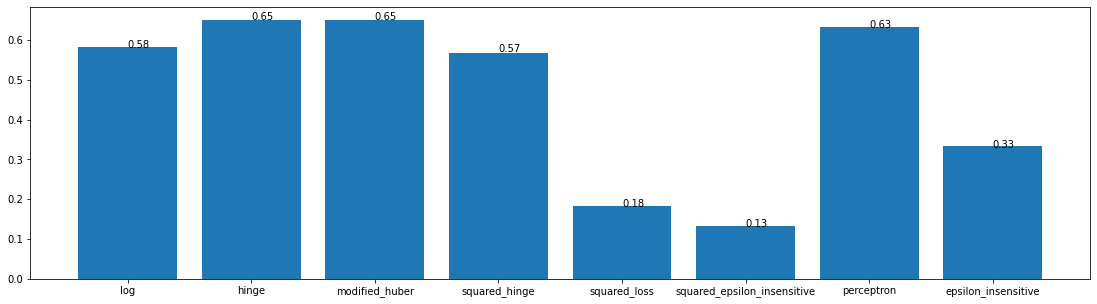

In [17]:
#plot results
plt.rcParams["figure.figsize"] = [19, 5]
plt.bar(loss_functions, models_results)

for loss_function in range(len(loss_functions)):
  plt.text(loss_function,
           round(models_results[loss_function], 2),
           round(models_results[loss_function], 2))

Build an Ada Boost Classifier

In [23]:
#create and fit model for different numbers of estimators
estimators = [3, 8, 20, 50, 100, 200, 300, 400]
ada_boost_scores = []

for estimator in range(len(estimators)):

  model = AdaBoostClassifier(n_estimators = estimators[estimator],
                             learning_rate = 1)

  model.fit(X_train, y_train)

  ada_boost_scores.append(model.score(X_test, y_test))

ada_boost_scores

[0.6,
 0.6166666666666667,
 0.6333333333333333,
 0.5833333333333334,
 0.65,
 0.6666666666666666,
 0.65,
 0.6333333333333333]

([<matplotlib.axis.XTick at 0x7f919d9c02b0>,
 [Text(0, 0, '3'),
  Text(0, 0, '8'),
  Text(0, 0, '20'),
  Text(0, 0, '50'),
  Text(0, 0, '100'),
  Text(0, 0, '200'),
  Text(0, 0, '300'),
  Text(0, 0, '400')])

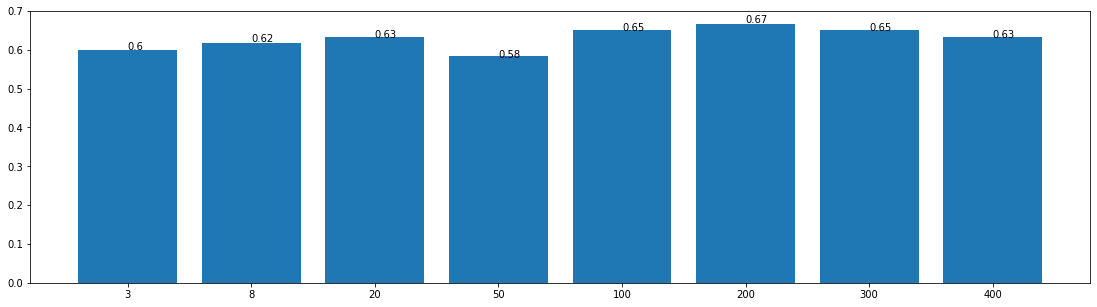

In [31]:
#plot results
plt.bar([estimator for estimator in range(len(estimators))],
        ada_boost_scores)

for estimator in range(len(estimators)):
  plt.text(estimator,
           round(ada_boost_scores[estimator], 2),
           round(ada_boost_scores[estimator], 2))

plt.xticks(range(len(estimators)),estimators)


Build a K Nearest Neighbors model

In [33]:
#create and fit model for different numbers of K
minimum_nearest_neighbors = 1
maximum_nearest_neighbors = 30
knn_scores = []

for neighbor in range(minimum_nearest_neighbors, maximum_nearest_neighbors):

  model = KNeighborsClassifier(n_neighbors = neighbor)

  model.fit(X_train, y_train)

  knn_scores.append(model.score(X_test, y_test))

knn_scores

[0.5666666666666667,
 0.6333333333333333,
 0.5666666666666667,
 0.6333333333333333,
 0.6333333333333333,
 0.6666666666666666,
 0.6333333333333333,
 0.6,
 0.5666666666666667,
 0.5666666666666667,
 0.55,
 0.5833333333333334,
 0.5833333333333334,
 0.6166666666666667,
 0.6,
 0.6,
 0.6166666666666667,
 0.65,
 0.6333333333333333,
 0.6333333333333333,
 0.6333333333333333,
 0.6166666666666667,
 0.6166666666666667,
 0.6333333333333333,
 0.6,
 0.6,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667]

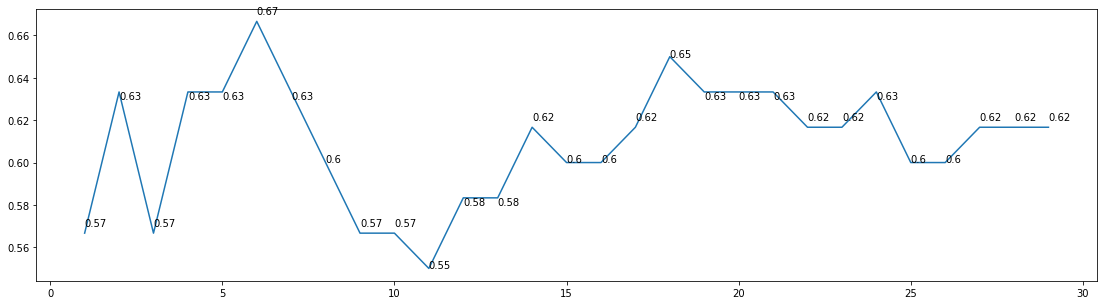

In [35]:
#plot results
plt.plot([neighbor for neighbor in range(minimum_nearest_neighbors, maximum_nearest_neighbors)],
         knn_scores)

for neighbor in range(minimum_nearest_neighbors, maximum_nearest_neighbors):
  plt.text(neighbor,
           round(knn_scores[neighbor - 1], 2),
           round(knn_scores[neighbor - 1], 2))